# NOTEBOOK - 2

# Importing Libraries

In [49]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Importing the dataset 

In [50]:
import pandas as pd
df = pd.read_csv("medical_conditions_dataset.csv")
df

,id,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,1,User0001,NaN,male,Non-Smoker,NaN,NaN,NaN,Pneumonia
1,2,User0002,30.0,male,Non-Smoker,NaN,105.315064,NaN,Diabetic
2,3,User0003,18.0,male,Non-Smoker,35.612486,NaN,NaN,Pneumonia
3,4,User0004,NaN,male,Non-Smoker,NaN,99.119829,NaN,Pneumonia
4,5,User0005,76.0,male,Non-Smoker,NaN,NaN,NaN,Diabetic
...,...,...,...,...,...,...,...,...,...
9995,9996,User9996,NaN,male,Non-Smoker,25.029002,152.540355,137.551451,Pneumonia
9996,9997,User9997,NaN,male,Non-Smoker,27.017487,NaN,NaN,Diabetic
9997,9998,User9998,23.0,male,Smoker,NaN,148.833321,173.931480,Pneumonia
9998,9999,User9999,NaN,female,Non-Smoker,NaN,NaN,NaN,Pneumonia


# 1. Feature Selection and Preprocessing 

1. Problem-Specific Feature Selection
The features chosen should directly relate to smoking behavior. For example:
    
* Age: Smoking habits often vary by age, making it an important feature.
* Gender: Smoking rates differ between genders, so gender is crucial.
* Income: Smoking rates are sometimes higher among lower-income groups.
* Education: Higher education levels tend to correlate with lower smoking rates.
* Occupation: Certain occupations may have higher smoking rates due to stress or social factors.
These features are selected based on their clear connection to smoking behavior.

2. Domain Knowledge
Understanding the problem helps identify key features, even if not immediately apparent statistically. For instance:

* Health variables: Chronic diseases or mental health issues might affect smoking behaviors.
* Social influences: Family or friends who smoke can influence one's smoking habits.

These insights help ensure the model reflects real-world factors affecting smoking.

# Data Cleaning and EDA

In [51]:
# Summary Statistics 
df.describe()

,id,age,bmi,blood_pressure,glucose_levels
count,10000.00000,5445.000000,4652.000000,3766.000000,4756.000000
mean,5000.50000,53.541598,27.423420,135.209429,135.219608
std,2886.89568,20.925113,7.231257,26.041531,37.607638
min,1.00000,18.000000,15.012119,90.009620,70.015961
25%,2500.75000,35.000000,21.077894,113.107754,102.273703
50%,5000.50000,54.000000,27.326204,134.821040,135.436764
75%,7500.25000,72.000000,33.689330,157.949509,168.349011
max,10000.00000,89.000000,39.998687,179.999359,199.890429


In [52]:
# Checking %age of missing values in the dataset 
df.isnull().mean()*100

id                 0.00
full_name          0.00
age               45.55
gender             0.00
smoking_status     0.00
bmi               53.48
blood_pressure    62.34
glucose_levels    52.44
condition          0.00
dtype: float64

Missing Data Summary:
                Missing Count  Missing Percentage
blood_pressure           6234               62.34
bmi                      5348               53.48
glucose_levels           5244               52.44
age                      4555               45.55


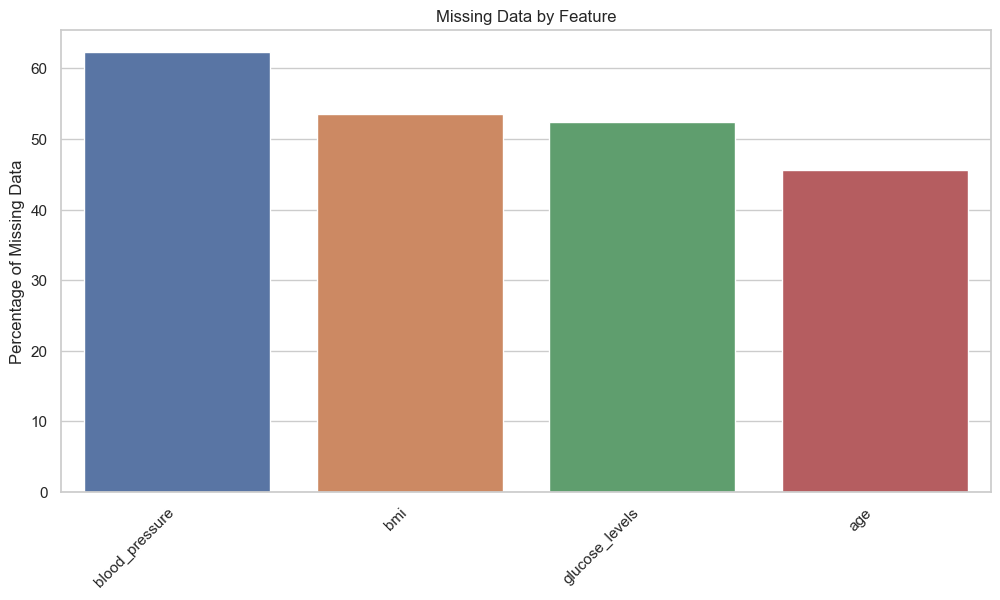

In [53]:
# missing data analysis 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Checking missing values per column
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)
print("Missing Data Summary:")
print(missing_df)

# 2. Visualize percentage of missing data as a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_df.index, y='Missing Percentage', data=missing_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage of Missing Data')
plt.title('Missing Data by Feature')
plt.show()


In [54]:
# Data Cleaning

# Dropping unnecessary columns
df.drop(columns=['id', 'full_name'], inplace=True)
# Convert 'age' into integer, marking small values or nulls as NA
df['age'] = df['age'].apply(lambda x: int(x) if pd.notna(x) and x > 1 else pd.NA)
# Drop rows where age is missing
df = df.dropna(subset=['age'])
# Reset index (optional but recommended)
df.reset_index(drop=True, inplace=True)

# Imputation Technique 2 - Simple Imputation : Mean, Median, Mode

Simple imputation is a straightforward and commonly used technique for handling missing data. 

It involves filling in missing values using a central tendency measure:
* Mean imputation for numerical features assumes values are normally distributed.
* Median imputation is robust to outliers and works well for skewed distributions.
* Mode imputation is used for categorical features, replacing missing values with the most frequent category.

This method preserves dataset size and structure, making it computationally efficient.
However, it can underestimate variability and may bias the data if the missingness is not completely random.

# Checking Distribution of Columns

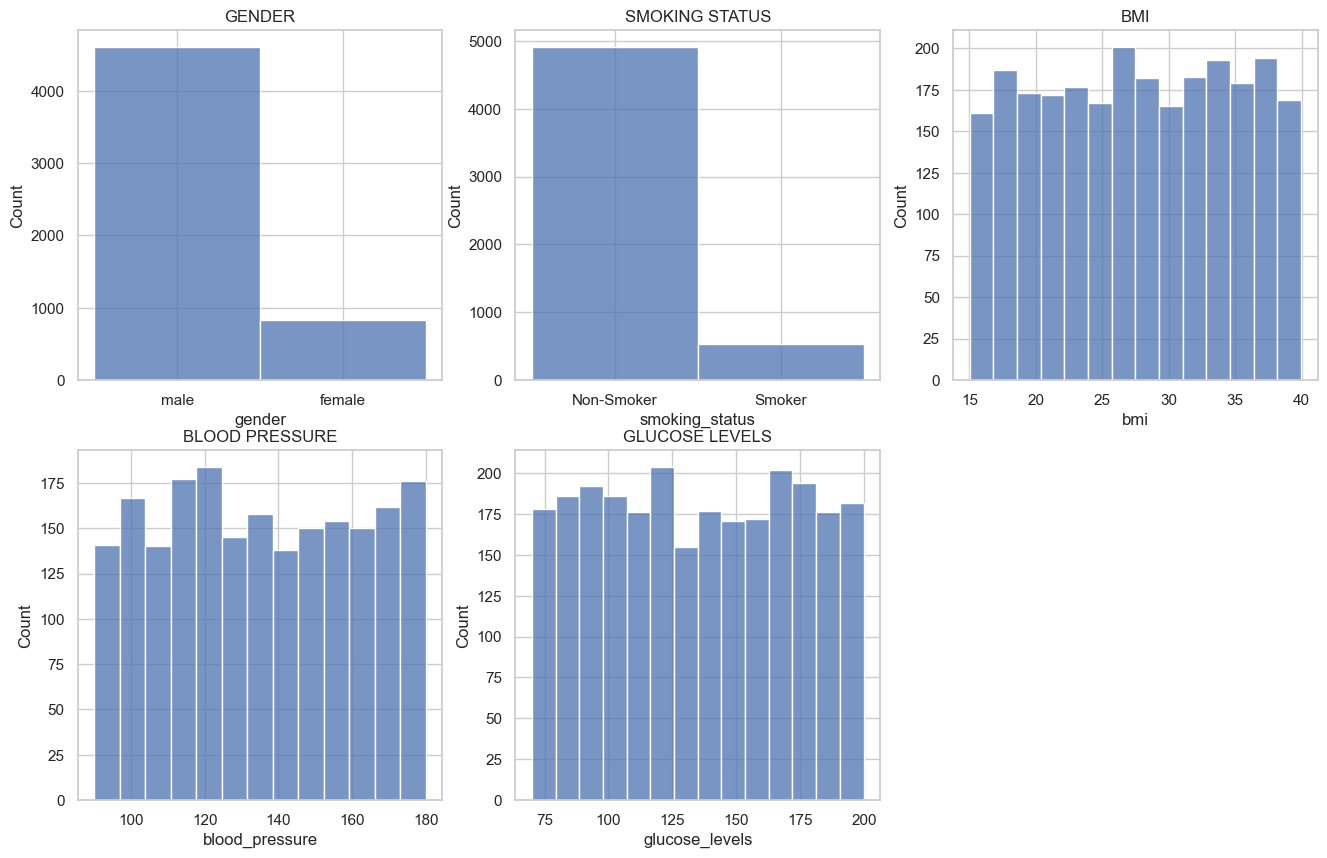

In [55]:
plt.figure(figsize=(16, 10))
# Manually create subplots for each column 4 plt.subplot(2, 3, 1)
plt.subplot(2, 3, 1)
sns.histplot(df['gender'])
plt.title('GENDER')

plt.subplot(2, 3, 2)
sns.histplot(df['smoking_status']) 
plt.title('SMOKING STATUS')

plt.subplot(2, 3, 3)
sns.histplot(df['bmi'])
plt.title('BMI')

plt.subplot(2, 3, 4)
sns.histplot(df['blood_pressure'])
plt.title('BLOOD PRESSURE')

plt.subplot(2, 3, 5)
sns.histplot(df['glucose_levels'])
plt.title('GLUCOSE LEVELS')
# Adjust the layout for better spacing 25 plt.tight_layout()
# Display the plots
plt.show()

# Simple Imputation

In [56]:
imp1 = SimpleImputer(strategy='median')  
imp2 = SimpleImputer(strategy='most_frequent')  
imp3 = SimpleImputer(strategy="mean")
# Define the ColumnTransformer
ct = ColumnTransformer(
    transformers=[
        ('Mode_gender', imp2, ['gender']),
        ('Mode_married', imp2, ['smoking_status']),
        ('Median_glucose', imp1, ['glucose_levels']),
        ('Mode_bmi', imp3, ['bmi']),
        ('Median_blood_pressure', imp3, ['blood_pressure'])
    ], 
    remainder="passthrough"  # Keep the remaining columns in the dataset unchanged
)

# Convert the transformed data back to a DataFrame and ensure column names are retained
ct.set_output(transform="pandas").set_params(verbose_feature_names_out=False)
df = ct.fit_transform(df)

# Ensure original column names are preserved
df = pd.DataFrame(df, columns=df.columns)
df.head()

,gender,smoking_status,glucose_levels,bmi,blood_pressure,age,condition
0,male,Non-Smoker,134.912683,27.642476,105.315064,30,Diabetic
1,male,Non-Smoker,134.912683,35.612486,135.222041,18,Pneumonia
2,male,Non-Smoker,134.912683,27.642476,135.222041,76,Diabetic
3,male,Non-Smoker,134.912683,33.840723,135.222041,40,Diabetic
4,male,Smoker,153.151126,27.642476,135.222041,49,Cancer


In [57]:
# Check the missing values percentage after transformation
print(df.isnull().mean() * 100)

gender            0.0
smoking_status    0.0
glucose_levels    0.0
bmi               0.0
blood_pressure    0.0
age               0.0
condition         0.0
dtype: float64


# Handling Outliers 

In [58]:
# Manually specify numerical columns to check for outliers
numerical_cols = ['age', 'bmi', 'blood_pressure', "glucose_levels"]

# Compute Q1, Q3, and IQR
Q1 = df[['age', 'bmi', 'blood_pressure']].quantile(0.25)
Q3 = df[['age', 'bmi', 'blood_pressure']].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows: keep only those that are not outliers in any specified column
df_no_outliers_iqr = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]

# Display how many rows were removed
print(f"Rows before: {df.shape[0]}")
print(f"Rows after outlier removal: {df_no_outliers_iqr.shape[0]}")


Rows before: 5445
Rows after outlier removal: 1848


/var/folders/3z/04dfh84n663cm0t0v83rlcv00000gn/T/ipykernel_1737/3347998392.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df[['age', 'bmi', 'blood_pressure']].quantile(0.25)
/var/folders/3z/04dfh84n663cm0t0v83rlcv00000gn/T/ipykernel_1737/3347998392.py:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df[['age', 'bmi', 'blood_pressure']].quantile(0.75)
/var/folders/3z/04dfh84n663cm0t0v83rlcv00000gn/T/ipykernel_1737/3347998392.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before 

Insights 

In the dataset, outliers were identified and removed using the **Interquartile Range (IQR)** method, focusing on the numerical features: **age**, **bmi**, **blood\_pressure**, and **glucose\_levels**. The **25th percentile (Q1)** and **75th percentile (Q3)** were computed, and the IQR was determined as the difference between Q3 and Q1. Data points that fell **below** $Q1 - 1.5 \times \text{IQR}$ or **above** $Q3 + 1.5 \times \text{IQR}$ were considered outliers and removed. As a result, **66% of the original data** was removed, leaving only **1848 rows** from an initial 5445. While this removal helps improve the quality of the data by reducing the impact of extreme values that could skew model results, it also means we have lost a significant portion of the dataset. This trade-off could affect the model's ability to generalize, and further analysis may be needed to explore different strategies for handling outliers, such as imputation, to retain more data.


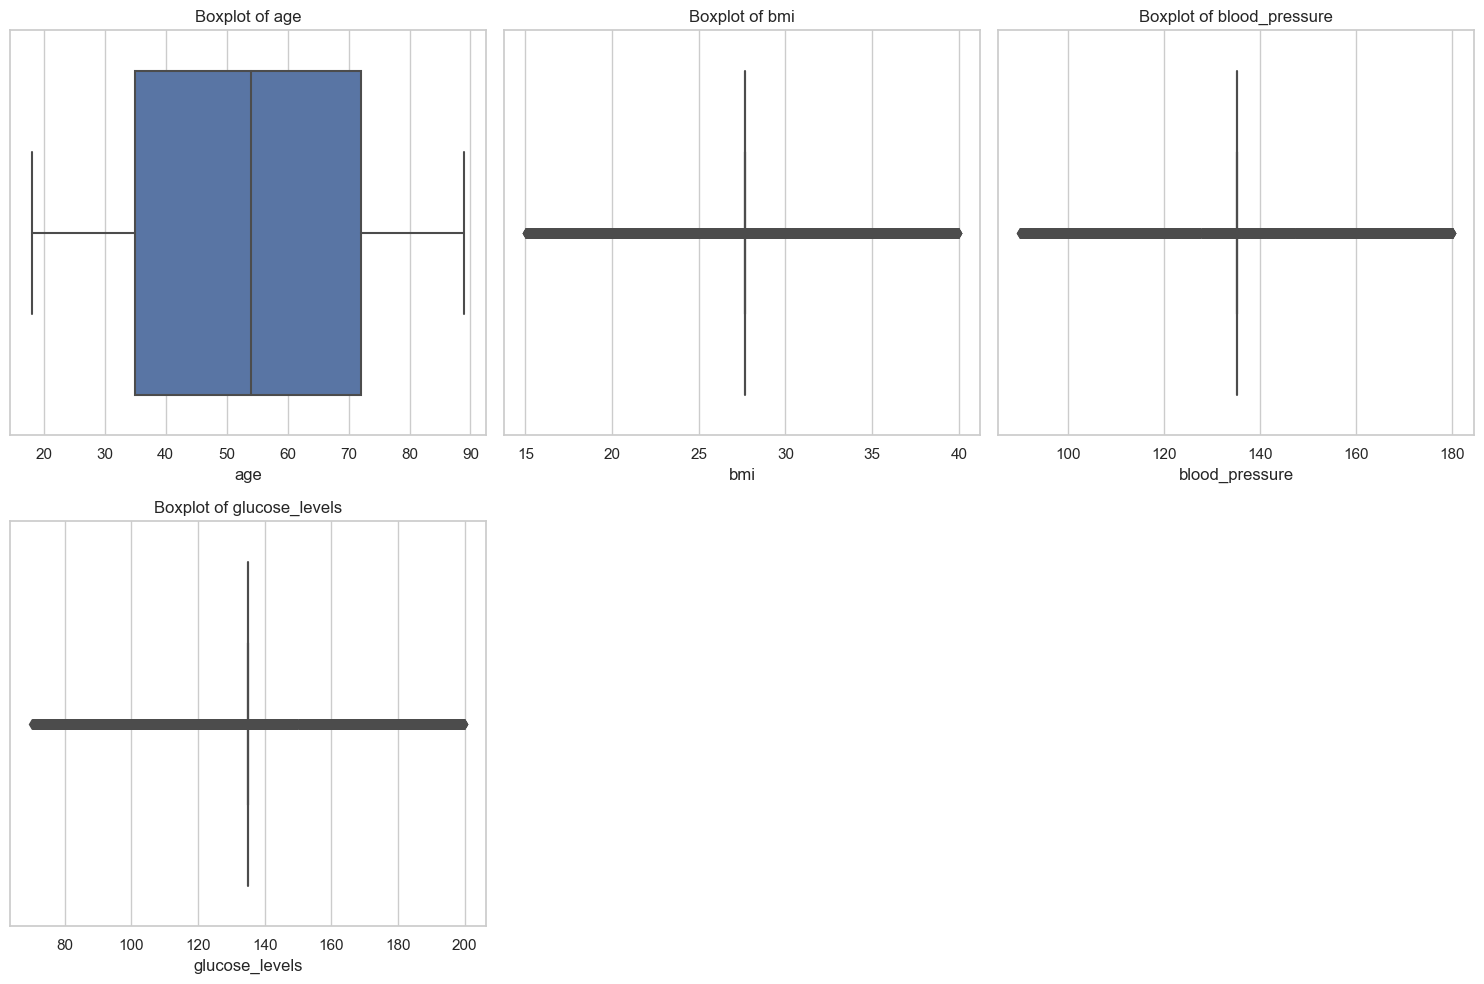

In [59]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot((len(numerical_cols)-1)//3 + 1, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


# Encoding

In [60]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd

# Step 1: Separate features and target
y = df['smoking_status'] 
encod3 = LabelEncoder()
y = encod3.fit_transform(y) 

# Step 2: Define columns for encoding
onehot_cols = ["gender"]
ordinal_cols = ["condition"]
feature_cols = [col for col in df.columns if col not in (["smoking_status"])]  # all features except target

# Step 3: Define ColumnTransformer
ct = ColumnTransformer(transformers=[
    ('gender_onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_cols),
    ('condition_ordinal', OrdinalEncoder(categories=[["Diabetic", "Pneumonia", "Cancer"]]), ordinal_cols)
], remainder="passthrough")

# Step 4: Fit and transform only features
X = ct.fit_transform(df[feature_cols])  # Only features, not target

# Step 5: Create column names for the new DataFrame
new_columns = []
new_columns += list(ct.named_transformers_['gender_onehot'].get_feature_names_out(onehot_cols))  # OneHot names
new_columns += ordinal_cols  # Ordinal names
# Passthrough columns: all columns not encoded
passthrough_cols = [col for col in feature_cols if col not in onehot_cols + ordinal_cols]
new_columns += passthrough_cols

# Step 6: Reconstruct final X DataFrame
X = pd.DataFrame(X, columns=new_columns)
X.head()

,gender_female,gender_male,condition,glucose_levels,bmi,blood_pressure,age
0,0.0,1.0,0.0,134.912683,27.642476,105.315064,30
1,0.0,1.0,1.0,134.912683,35.612486,135.222041,18
2,0.0,1.0,0.0,134.912683,27.642476,135.222041,76
3,0.0,1.0,0.0,134.912683,33.840723,135.222041,40
4,0.0,1.0,2.0,153.151126,27.642476,135.222041,49


# Scaling 

In [61]:
from sklearn.preprocessing import StandardScaler
# Specify the columns to scale
columns_to_scale = ['age', 'bmi', 'blood_pressure', 'glucose_levels']
scaler = StandardScaler()
# Fit and transform 
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.head()  

,gender,smoking_status,glucose_levels,bmi,blood_pressure,age,condition
0,male,Non-Smoker,-0.002474,1.463418e-15,-1.872224,-1.125144,Diabetic
1,male,Non-Smoker,-0.002474,1.641485e+00,0.000000,-1.698670,Pneumonia
2,male,Non-Smoker,-0.002474,1.463418e-15,0.000000,1.073374,Diabetic
3,male,Non-Smoker,-0.002474,1.276577e+00,0.000000,-0.647205,Diabetic
4,male,Smoker,0.705934,1.463418e-15,0.000000,-0.217060,Cancer


# 2. Model Training and Evaluation

I chose to evaluate **Logistic Regression, Random Forest, and Support Vector Machine (SVM)** models for this dataset to identify the most effective approach for predicting smoking status (smoker or non-smoker). **Logistic Regression** was selected for its simplicity, interpretability, and suitability for binary classification. It provides clear insights into how each feature—such as age, gender, and income—influences the likelihood of smoking, which is valuable for explaining the results. **Random Forest** was included due to its ability to capture complex, non-linear patterns and handle feature interactions automatically, making it robust and less prone to overfitting. It also handles imbalanced data more effectively through its ensemble nature. **SVM** was considered because of its effectiveness in high-dimensional spaces and its strong theoretical foundations for binary classification tasks. By comparing these three models, I was able to balance interpretability, predictive performance, and robustness, ultimately helping to identify the most appropriate model for this classification problem.


# Train Test Split 

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model 1 - Logistic Regression 

In [63]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model

LogisticRegression(max_iter=1000)

# Evaluation Metrics 

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
cm = confusion_matrix(y_test, y_pred)


print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro):    {recall:.4f}")
print(f"F1 Score (Macro):  {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)


Accuracy:  0.9027
Precision (Macro): 0.4513
Recall (Macro):    0.5000
F1 Score (Macro):  0.4744

Confusion Matrix:
[[983   0]
 [106   0]]


# Cross Validation 

In [65]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

array([0.90252294, 0.90355913, 0.90241102, 0.90241102, 0.90241102])

# 3. Hyperparameter Tuning with best parameters 

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define numeric features (already one-hot encoded)
numeric_features = [
    'age', 'bmi', 'blood_pressure', 'glucose_levels', 
    'gender_female', 'gender_male', 'condition'
]

# Preprocessing: scale numeric features only
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features)
], remainder='passthrough')

# Fit and transform X_train, transform X_test
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Train Logistic Regression with best params
final_model = LogisticRegression(
    C=0.01,
    penalty='l2',
    solver='lbfgs',
    max_iter=100,
    fit_intercept=True,
    random_state=42,
    class_weight='balanced'
)
final_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = final_model.predict(X_test_scaled)

# New Evaluation Metrics

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision (macro)
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision (Macro): {precision:.4f}")

# Recall (macro)
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall (Macro): {recall:.4f}")

# F1 Score (macro)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score (Macro): {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.4123
Precision (Macro): 0.5117
Recall (Macro): 0.5314
F1 Score (Macro): 0.3623

Confusion Matrix:
[[377 606]
 [ 34  72]]


# Model 2 - Random Forest 

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_model

RandomForestClassifier(random_state=42)

# Evaluation Metrics 

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Train Random Forest with OOB score enabled
rf_model = RandomForestClassifier(random_state=42, oob_score=True)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_rf)

# Precision, Recall, F1 (macro averages for multiclass fairness)
precision = precision_score(y_test, y_pred_rf, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred_rf, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred_rf, average='macro', zero_division=0)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# OOB Score
oob_score = rf_model.oob_score_

# Print metrics
print("Random Forest Classifier Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"F1 Score (Macro): {f1:.4f}")
print(f"OOB Score: {oob_score:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)


Random Forest Classifier Evaluation Metrics:
Accuracy: 0.8926
Precision (Macro): 0.4897
Recall (Macro): 0.4986
F1 Score (Macro): 0.4800
OOB Score: 0.8889

Confusion Matrix:
[[971  12]
 [105   1]]


# Cross Validation 

In [70]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

array([0.89220183, 0.89667049, 0.89552239, 0.89437428, 0.89667049])

# Hyperparameter Tuning with best parameters 

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features)
], remainder='passthrough')

# Create a pipeline with preprocessing and Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Hyperparameter grid for Random Forest
rf_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

# Grid search
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Best model and predictions
best_rf = rf_grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)


# New Evaluation Metrics 

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Re-train Random Forest with OOB score enabled
rf_model = RandomForestClassifier(random_state=42, oob_score=True)
rf_model.fit(X_train, y_train)

# --- Random Forest Evaluation ---
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics
print("Random Forest Classifier Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision (Macro):", precision_score(y_test, y_pred_rf, average='macro', zero_division=0))
print("Recall (Macro):", recall_score(y_test, y_pred_rf, average='macro', zero_division=0))
print("F1 Score (Macro):", f1_score(y_test, y_pred_rf, average='macro', zero_division=0))
print("OOB Score:", rf_model.oob_score_)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\n")


Random Forest Classifier Evaluation Metrics:
Accuracy: 0.8925619834710744
Precision (Macro): 0.4896697169002002
Recall (Macro): 0.49861321714428297
F1 Score (Macro): 0.4799915109317161
OOB Score: 0.8888888888888888
Confusion Matrix:
 [[971  12]
 [105   1]]




# Model 3 - SVM (Support Vector Machine)

In [73]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_model

SVC()

# Evaluation Metrics

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred_rf)

# Precision, Recall, F1 (macro averages for multiclass fairness)
precision = precision_score(y_test, y_pred_rf, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred_rf, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred_rf, average='macro', zero_division=0)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Print metrics
print("Random Forest Classifier Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"F1 Score (Macro): {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)


Random Forest Classifier Evaluation Metrics:
Accuracy: 0.8926
Precision (Macro): 0.4897
Recall (Macro): 0.4986
F1 Score (Macro): 0.4800

Confusion Matrix:
[[971  12]
 [105   1]]


# Cross Validation 

In [75]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

array([0.89220183, 0.89667049, 0.89552239, 0.89437428, 0.89667049])

# Hyperparameter Tuning with best parameters 

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Define numeric features (already one-hot encoded)
numeric_features = [
    'age', 'bmi', 'blood_pressure', 'glucose_levels', 
    'gender_female', 'gender_male', 'condition'
]

# Preprocessing: scale numeric features only
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features)
], remainder='passthrough')

# Fit and transform X_train, transform X_test
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Train SVM with selected parameters
final_model = SVC(
    C=0.01,
    kernel='rbf',
    gamma='scale',
    class_weight='balanced',
    random_state=42
)
final_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = final_model.predict(X_test_scaled)


# New Evaluation Metrics 

In [77]:
# --- SVM Evaluation ---
y_pred_svm = final_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision (Macro):", precision_score(y_test, y_pred_svm, average='macro'))
print("Recall (Macro):", recall_score(y_test, y_pred_svm, average='macro'))
print("F1 Score (Macro):", f1_score(y_test, y_pred_svm, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.9026629935720845
Precision (Macro): 0.45133149678604223
Recall (Macro): 0.5
F1 Score (Macro): 0.4744208494208494
Confusion Matrix:
 [[983   0]
 [106   0]]


/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Choosing the best Model 

The Random Forest model has the highest F1 score, indicating the best balance between precision and recall across the classes. This is especially important when dealing with imbalanced datasets like smoking status prediction. Random Forest also:

Handles non-linear relationships better than Logistic Regression and linear SVM.
Is more robust to outliers and irrelevant features.
Works well without extensive preprocessing (e.g., scaling, feature engineering).
While SVM is close in performance, Random Forest slightly outperforms it and is typically more interpretable and faster to tune.

# Pipeline 

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Define the pipeline with Random Forest
pipeline = Pipeline(steps=[
    ('preprocessor', ct),
    ('classifier', RandomForestClassifier(random_state=42))
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender_onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender']),
                                                 ('condition_ordinal',
                                                  OrdinalEncoder(categories=[['Diabetic',
                                                                              'Pneumonia',
                                                                              'Cancer']]),
                                                  ['condition'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

# 4. Performance Impact on Models

The simple imputation technique (Mean, Median, Mode) was applied to handle missing values in the dataset before training the model. Missing values were notably present in certain columns such as age, bmi, blood_pressure, and glucose_levels, with missing data percentages as high as 53.48% in bmi, and up to 62.34% in blood_pressure and 52.44% in glucose_levels. This missing data would likely have impacted the model performance, and imputing these missing values enabled the model to learn more effectively, albeit the imputation might have impacted the model's ability to accurately represent the true underlying patterns in the data.

# Comparison of Evaluation Metrics across 3 Models

In [79]:
import pandas as pd

# Define the metrics
comparison_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Precision (Macro)': [0.5117, 0.4897, 0.4513],
    'Recall (Macro)': [0.5314, 0.4986, 0.5000],
    'F1 Score (Macro)': [0.3623, 0.4800, 0.4744]
}

# Create DataFrame
comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)


                 Model  Precision (Macro)  Recall (Macro)  F1 Score (Macro)
0  Logistic Regression             0.5117          0.5314            0.3623
1        Random Forest             0.4897          0.4986            0.4800
2                  SVM             0.4513          0.5000            0.4744


# 5. Visuals & Presentation: Comparison Bar Chart

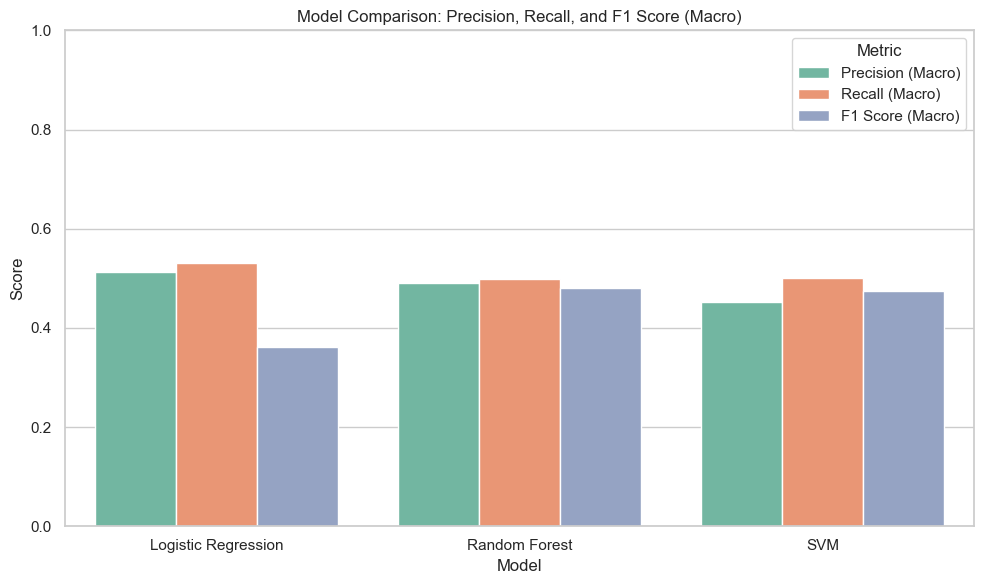

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the DataFrame for seaborn
melted_df = comparison_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df, x='Model', y='Score', hue='Metric', palette='Set2')

plt.title('Model Comparison: Precision, Recall, and F1 Score (Macro)')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


# 6. Interpretation and Conclusion 

Based on the evaluation metrics across the three models—Logistic Regression, Random Forest, and SVM—we can conclude that the **Random Forest model performs the best overall**. While Logistic Regression had the highest precision (0.5117) and recall (0.5314), its **F1 Score (Macro)** was significantly lower (0.3623), indicating a poor balance between precision and recall. In contrast, **Random Forest achieved the highest F1 Score (0.4800)**, demonstrating a more effective balance, especially critical in imbalanced classification tasks like predicting smoking status. SVM also performed well with an F1 Score of 0.4744, but slightly under Random Forest. Therefore, **Random Forest is the most suitable choice**, as it not only maintains reasonable precision and recall but also provides better generalization and robustness against overfitting.
